# Organoid Learning Evaluation
Using the CartPole system as a dynamic control task, these methods evaluate the adaptive learning capacity of cortical organoids using short, high-frequency training signals to targeted neurons.

In [2]:
import os
import sys
import numpy as np
import pickle
import importlib
import matplotlib.pyplot as plt

# Check module path
module_path = os.path.abspath(os.path.join(''))  # adjust if needed
if module_path not in sys.path:
    sys.path.append(module_path)

# Import / reload full modules
import core.data_loader as data_loader
importlib.reload(data_loader)
import core.analysis_utils as analysis_utils
importlib.reload(analysis_utils)
import viz.plots_general as plots_general
importlib.reload(plots_general)
import braindance
importlib.reload(braindance)
import core.map_utils as map_utils
importlib.reload(map_utils)
import OrgLearningEval
importlib.reload(OrgLearningEval)

# Import specific functions
from OrgLearningEval import OrgLearningEval


In [3]:
# Check if core directory is in sys.path

# Print out current working directory
print("Current working directory:", os.getcwd())

# Print search path list
print("\nPython sys.path:")
for p in sys.path:
    print("  ", p)

# Check whether 'core/data_loader.py' exists from this working directory
core_path = os.path.join(os.getcwd(), "core", "data_loader.py")
print("\nChecking for core/data_loader.py:")
print("Exists" if os.path.exists(core_path) else "  NOT FOUND")

# Check core directory contents
print("Contents of ./core/:", os.listdir("./core"))

Current working directory: /Users/main_mac/data/org_eval

Python sys.path:
   /Users/main_mac/data
   /Users/main_mac/data/org_eval/braindance
   /Users/main_mac/Applications/DataSpell.app/Contents/plugins/python-ce/helpers/pydev
   /Users/main_mac/Applications/DataSpell.app/Contents/plugins/python-ce/helpers-pro/jupyter_debug
   /opt/anaconda3/envs/brain/lib/python310.zip
   /opt/anaconda3/envs/brain/lib/python3.10
   /opt/anaconda3/envs/brain/lib/python3.10/lib-dynload
   
   /opt/anaconda3/envs/brain/lib/python3.10/site-packages
   /Users/main_mac/data/org_eval
   /opt/anaconda3/envs/brain/lib/python3.10/site-packages/setuptools/_vendor

Checking for core/data_loader.py:
Exists
Contents of ./core/: ['data_loader.py', '__init__.py', 'spike_data_utils.py', '__pycache__', 'map_utils.py', 'analysis_utils.py']


In [4]:
try:
    from core.data_loader import load_pickle, load_datasets
    print("Imported successfully.")
except Exception as e:
    print("Import failed:", e)


Imported successfully.


Loaded spike data for Baseline: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Adaptive: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Random: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Null: <class 'spikedata.spikedata.SpikeData'>
Loaded log data for Adaptive: <class 'dict'>, 5 entries
  Keys in Adaptive log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Random: <class 'dict'>, 5 entries
  Keys in Random log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Null: <class 'dict'>, 5 entries
  Keys in Null log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded causal_info keys: ['split_stim_patterns', 'stim_patterns', 'react_inds', 'wind_ms', 'remove_start_frames', 'N', 'pattern_counts', 'stim_times_dict', 'stim_log', 'data_path', 'clean_data_paths', 'first_order_connectivity', 'multi_order_connectivity', 'burst_percent', 'spikes']
Loaded metadata keys: ['mapping', 'fs', 'stim_electrodes

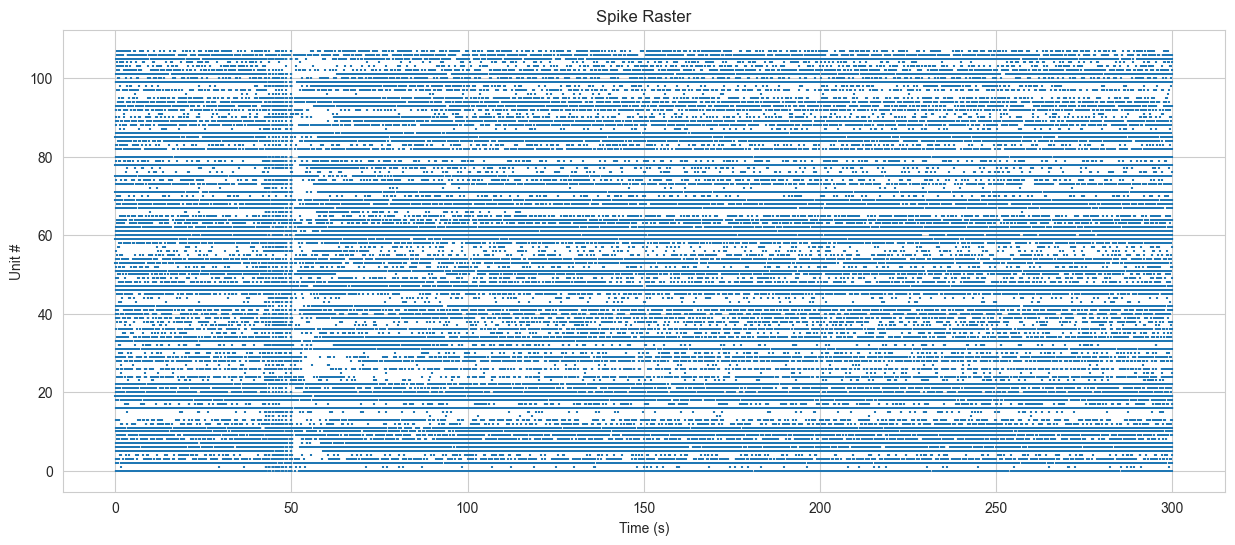

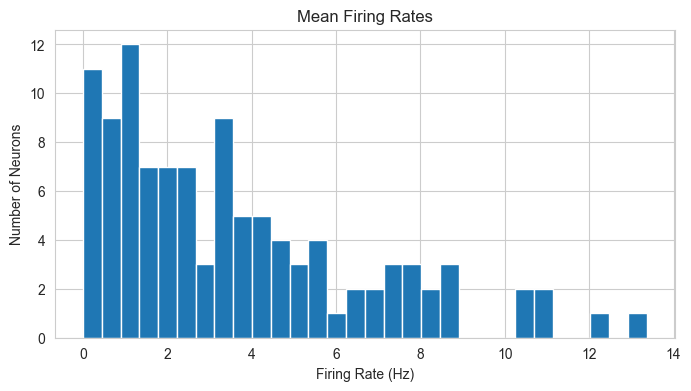

/opt/anaconda3/envs/brain/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brain/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


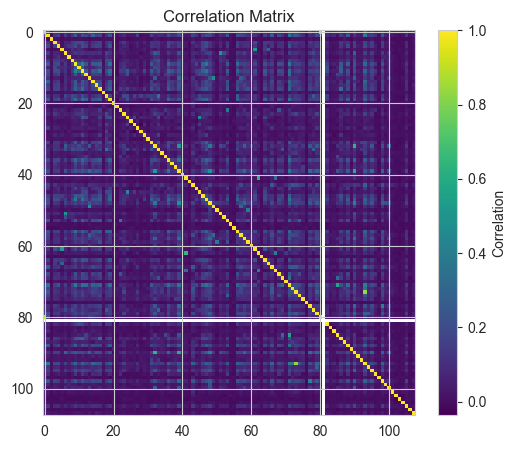

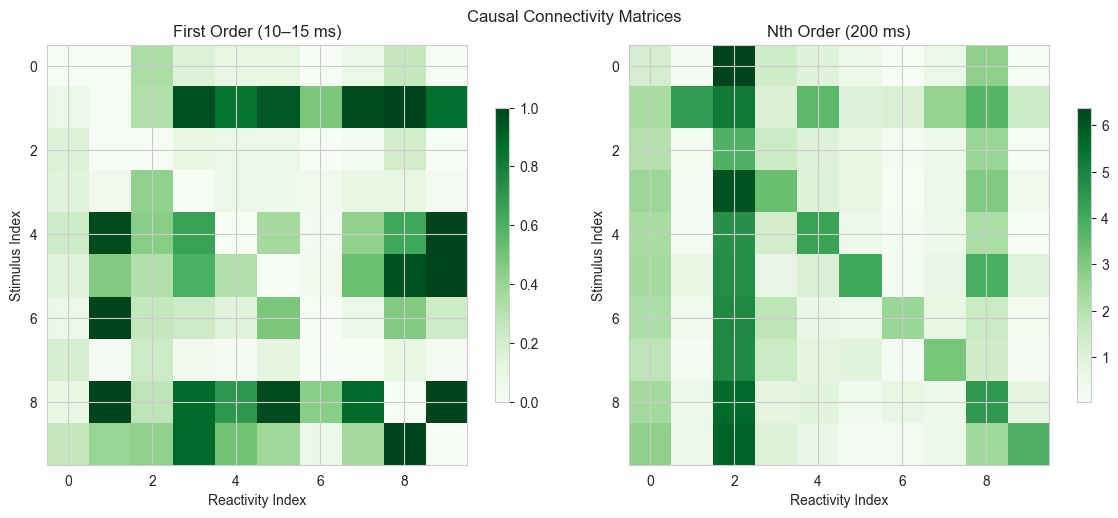

In [5]:
ole = OrgLearningEval()  # Loads all datasets and keys contained, sets "Baseline" as default dataset, and prints confirmation
ole.show_raster()        # Shows raster for default dataset
ole.show_mean_firing_rates() # Shows mean firing rate plot for default dataset
ole.show_correlation_matrix()  # Shows a correlation matrix plot for default dataset
ole.show_causal_plot() # Shows matrix of first-order and multi-order connectivity for organoid of interest

Switched to dataset: Adaptive


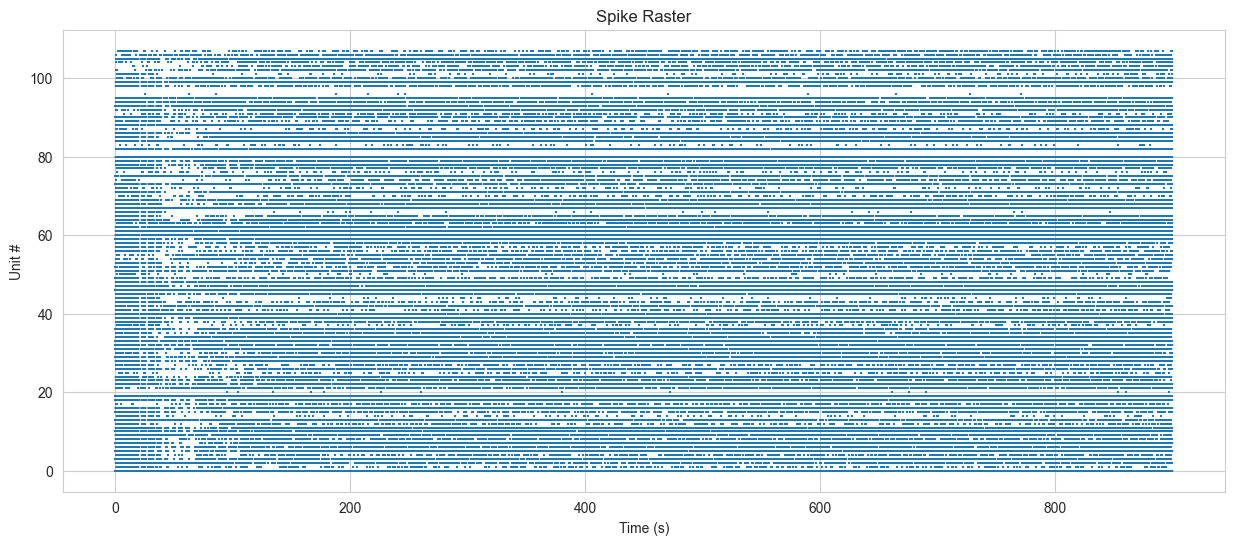

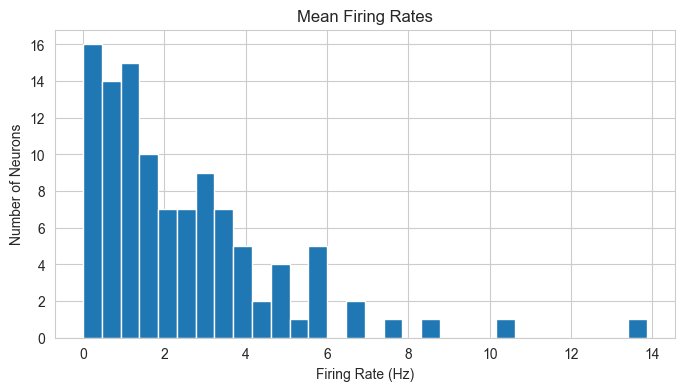

/opt/anaconda3/envs/brain/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/envs/brain/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


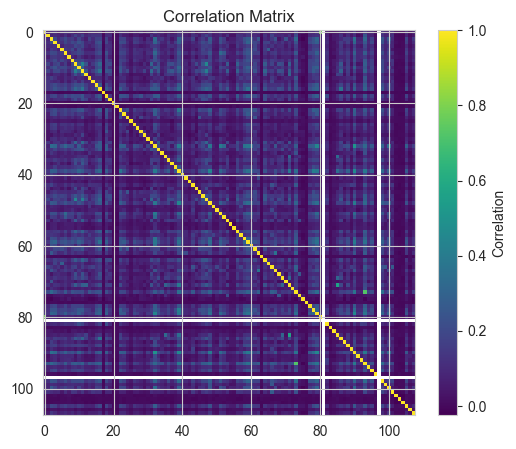

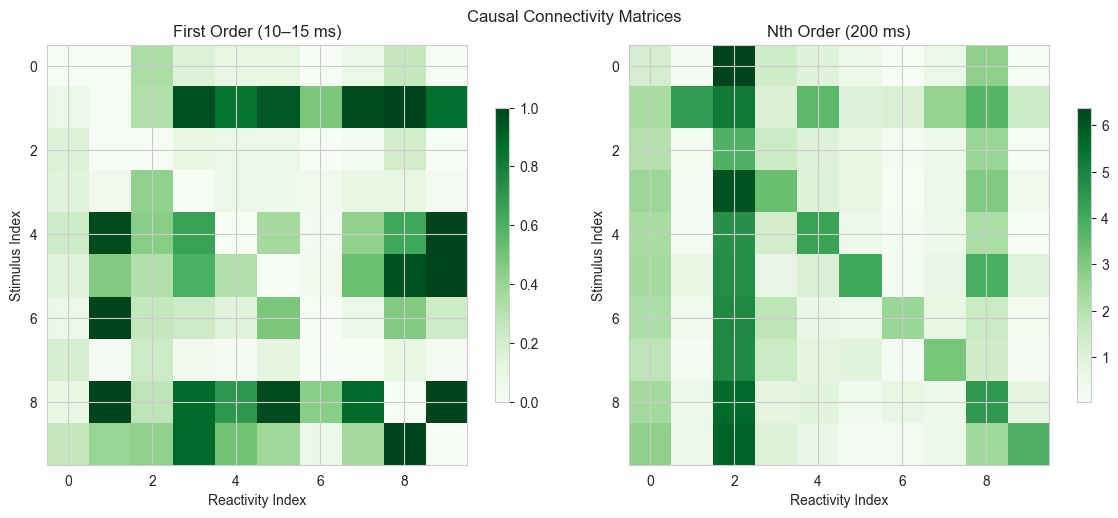

In [71]:
# Switch to different training condition and view plots
ole.set_dataset("Adaptive")
ole.show_raster()
ole.show_mean_firing_rates()
ole.show_correlation_matrix()
ole.show_causal_plot()


In [39]:
ole = OrgLearningEval()
reward_df = ole.get_reward_df("Adaptive")
reward_df.head()

Loaded spike data for Baseline: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Adaptive: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Random: <class 'spikedata.spikedata.SpikeData'>
Loaded spike data for Null: <class 'spikedata.spikedata.SpikeData'>
Loaded log data for Adaptive: <class 'dict'>, 5 entries
  Keys in Adaptive log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Random: <class 'dict'>, 5 entries
  Keys in Random log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded log data for Null: <class 'dict'>, 5 entries
  Keys in Null log: ['game', 'reward', 'log', 'pattern', '__label__']
Loaded causal_info keys: ['split_stim_patterns', 'stim_patterns', 'react_inds', 'wind_ms', 'remove_start_frames', 'N', 'pattern_counts', 'stim_times_dict', 'stim_log', 'data_path', 'clean_data_paths', 'first_order_connectivity', 'multi_order_connectivity', 'burst_percent', 'spikes']
Loaded metadata keys: ['mapping', 'fs', 'stim_electrodes

,time,episode,reward
0,3.911218,0,19.0
1,18.770805,1,56.0
2,24.654084,2,12.0
3,31.596691,3,17.0
4,38.112137,4,15.0


In [72]:
print("Adaptive Reward DataFrame:")
display(ole.get_reward_df("Adaptive").head())

print("\n Random Reward DataFrame:")
display(ole.get_reward_df("Random").head())

print("\n Null Reward DataFrame:")
display(ole.get_reward_df("Null").head())

Adaptive Reward DataFrame:


,time,episode,reward
0,3.911218,0,19.0
1,18.770805,1,56.0
2,24.654084,2,12.0
3,31.596691,3,17.0
4,38.112137,4,15.0



 Random Reward DataFrame:


,time,episode,reward
0,10.916741,0,53.0
1,22.128940,1,38.0
2,28.397783,2,14.0
3,35.692659,3,19.0
4,63.851734,4,120.0



 Null Reward DataFrame:


,time,episode,reward
0,4.958258,0,24.0
1,18.258702,1,48.0
2,26.177174,2,22.0
3,36.393520,3,33.0
4,42.694989,4,14.0


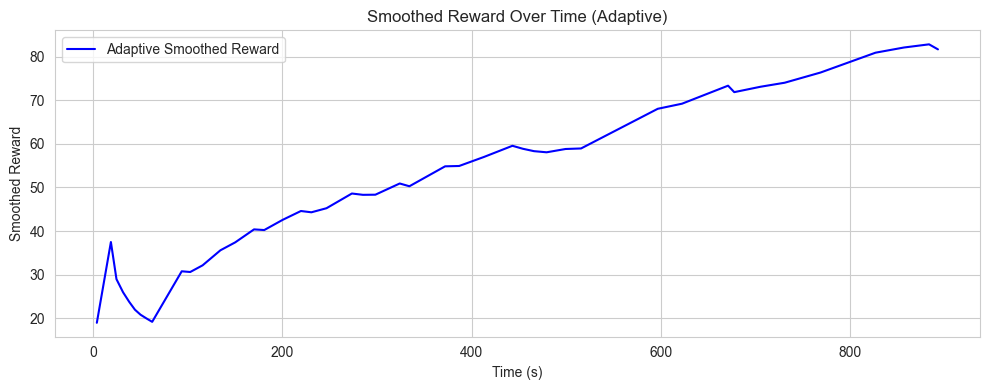

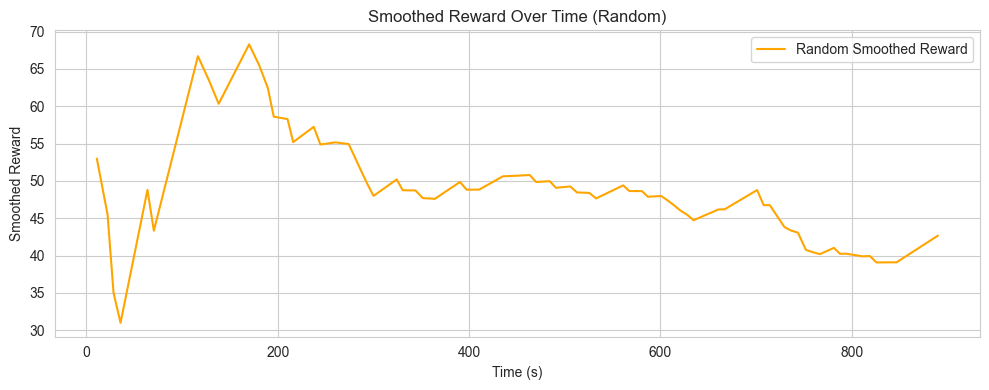

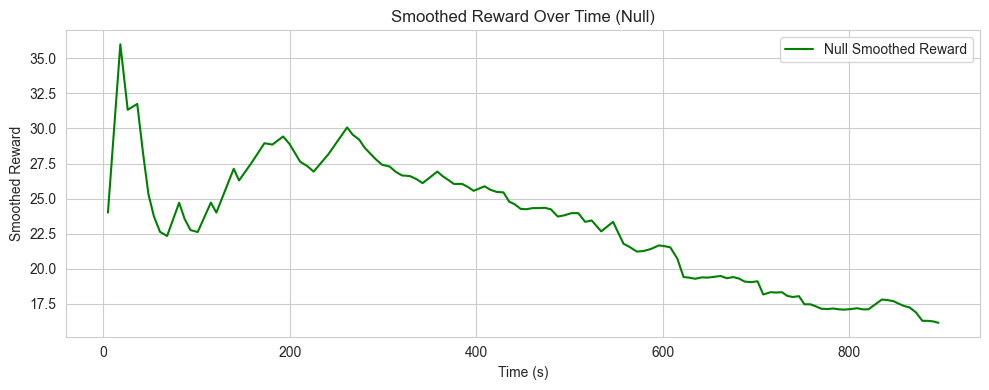

In [73]:
ole.show_reward_plot("Adaptive", color="blue")
ole.show_reward_plot("Random", color="orange")
ole.show_reward_plot("Null", color="green")

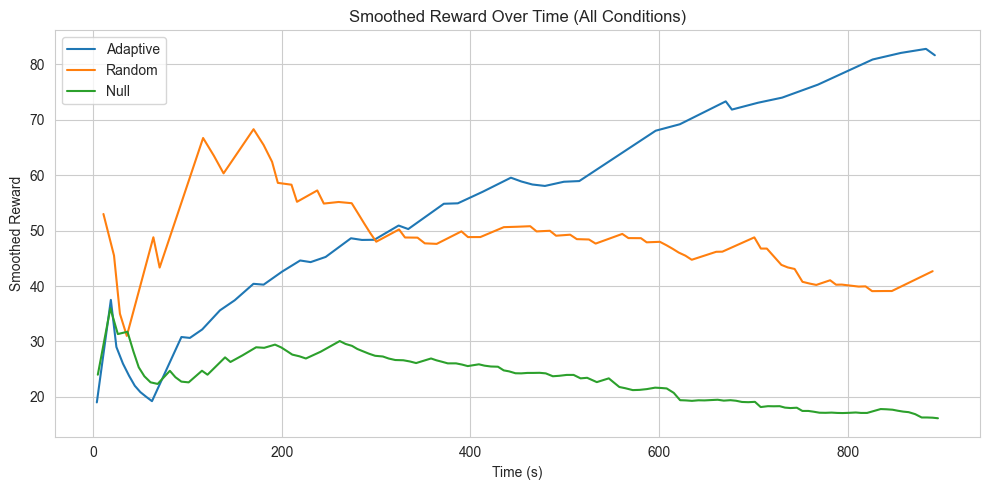

In [42]:
ole.show_all_rewards_overlay()

In [43]:
mapping_df = ole.metadata["mapping"]
mapping_df.head()

,channel,electrode,x,y
0,0,18598,2065.0,1470.0
1,1,20644,3220.0,1627.5
2,2,19040,2100.0,1505.0
3,3,21723,2852.5,1715.0
4,4,14939,3482.5,1172.5


In [74]:
with open("data/causal_info.pkl", "rb") as f:
    causal_info = pickle.load(f)

first_order = causal_info["first_order_connectivity"]
print(type(first_order))         # Should be <class 'numpy.ndarray'>
print(first_order.shape)        # Should be (N, N)

<class 'numpy.ndarray'>
(10, 10)


In [75]:
print("Training electrodes:", ole.metadata["training_electrodes"])
print("Encode electrodes:", ole.metadata["encode_electrodes"])
print("Decode electrodes:", ole.metadata["decode_electrodes"])

Training electrodes: [24768, 22182, 23923, 909, 3229, 17335]
Encode electrodes: [23275, 25039]
Decode electrodes: [18429, 18385]


In [76]:
encode_local = [0, 1]  # or any valid indices from 0 to 9
decode_local = [8, 9]  # also from 0 to 9

In [78]:
first_order = causal_info["first_order_connectivity"]
multi_order = causal_info["multi_order_connectivity"]
burst_percent = causal_info["burst_percent"]

c1_values = [first_order[i, j] for i in encode_local for j in decode_local]
cm_values = [multi_order[i, j] for i in encode_local for j in decode_local]
burst_values = [burst_percent[j] for j in decode_local]

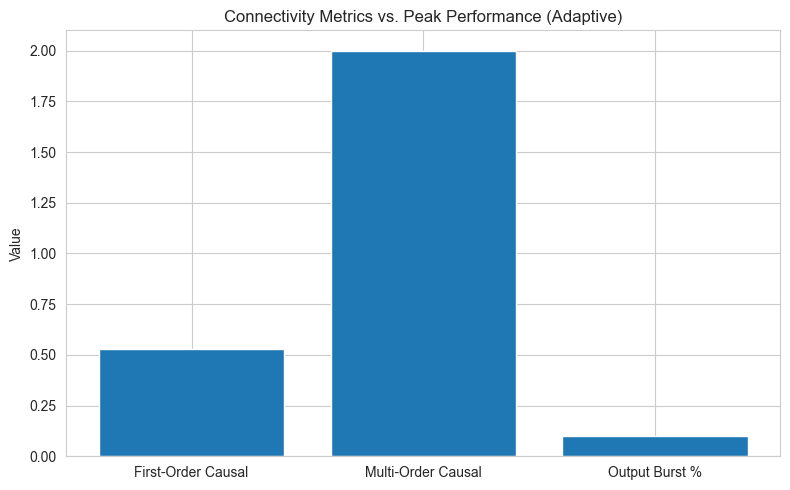

In [79]:
metrics = ["First-Order Causal", "Multi-Order Causal", "Output Burst %"]
values = [np.mean(c1_values), np.mean(cm_values), np.mean(burst_values)]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values)
plt.ylabel("Value")
plt.title("Connectivity Metrics vs. Peak Performance (Adaptive)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [80]:
indices = list(range(10))  # 10 training neurons

c1_values = [first_order[i, j] for i in indices for j in indices if i != j]
cm_values = [multi_order[i, j] for i in indices for j in indices if i != j]
burst_values = [burst_percent[j] for j in indices]

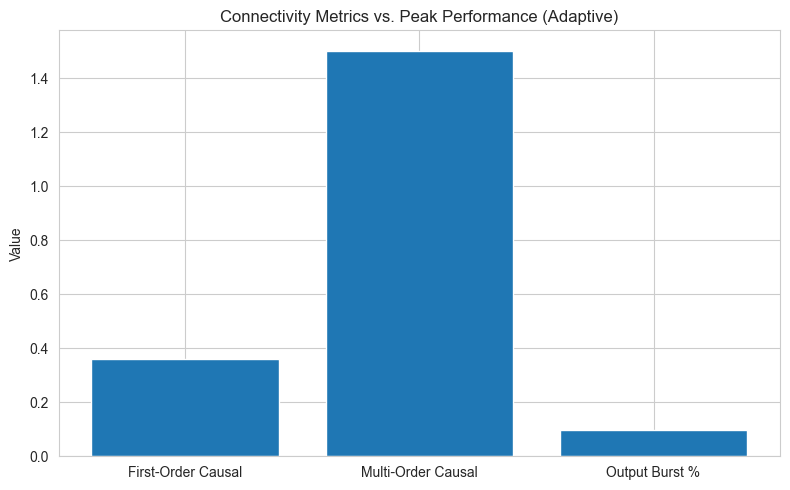

In [81]:
metrics = ["First-Order Causal", "Multi-Order Causal", "Output Burst %"]
values = [np.mean(c1_values), np.mean(cm_values), np.mean(burst_values)]

plt.figure(figsize=(8, 5))
plt.bar(metrics, values)
plt.ylabel("Value")
plt.title("Connectivity Metrics vs. Peak Performance (Adaptive)")
plt.grid(True)
plt.tight_layout()
plt.show()

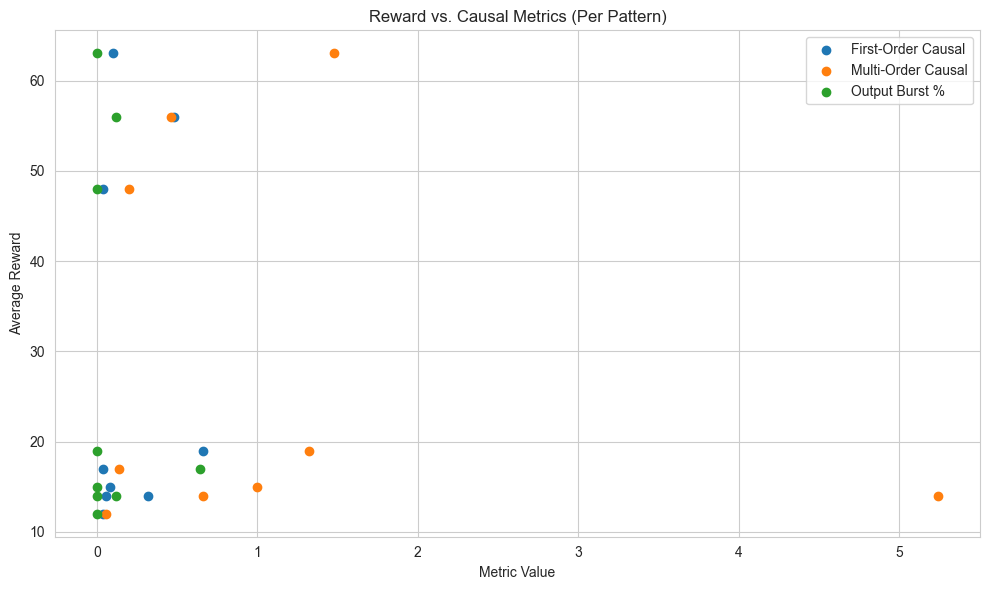

,Pattern,AvgReward,FirstOrder,MultiOrder,Burst
0,1-2,14.0,0.32,5.24,0.00
1,2-3,63.0,0.10,1.48,0.00
2,2-4,15.0,0.08,1.00,0.00
3,3-1,17.0,0.04,0.14,0.64
4,3-5,14.0,0.06,0.66,0.12
5,3-6,12.0,0.04,0.06,0.00
6,4-3,19.0,0.66,1.32,0.00
7,5-6,48.0,0.04,0.20,0.00
8,6-5,56.0,0.48,0.46,0.12


In [82]:
ole.show_reward_vs_causal_plot()            # Reward vs causal metrics for Adaptive

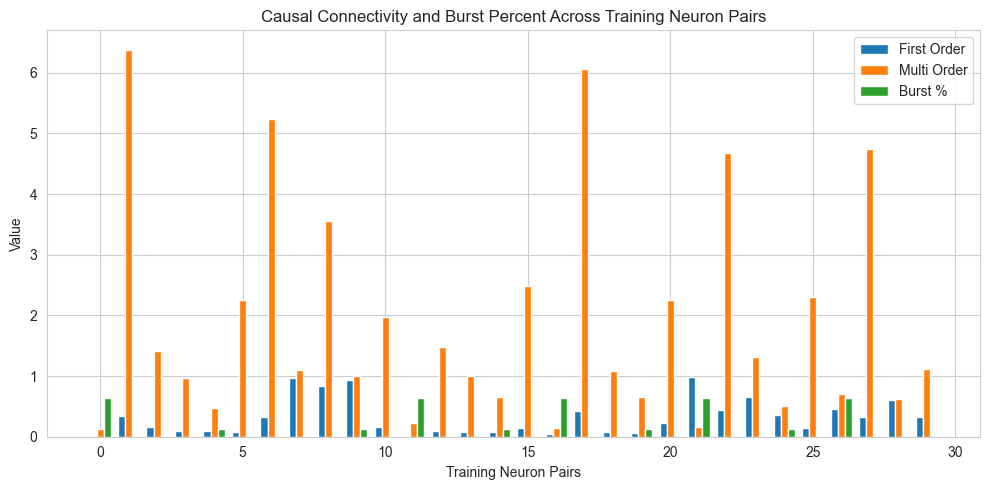

In [83]:
ole.show_training_pair_plot(num_neurons=6) # Metrics across 6 training neurons

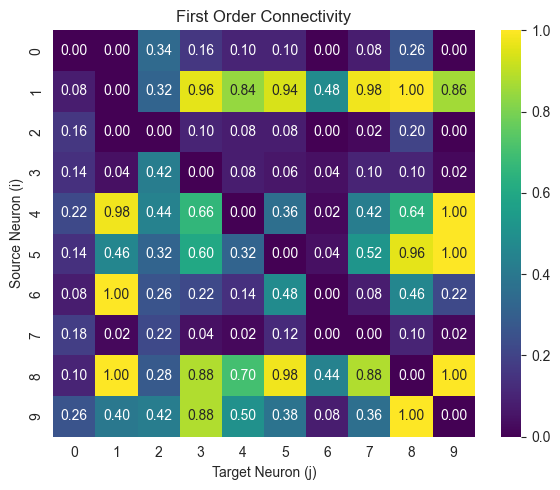

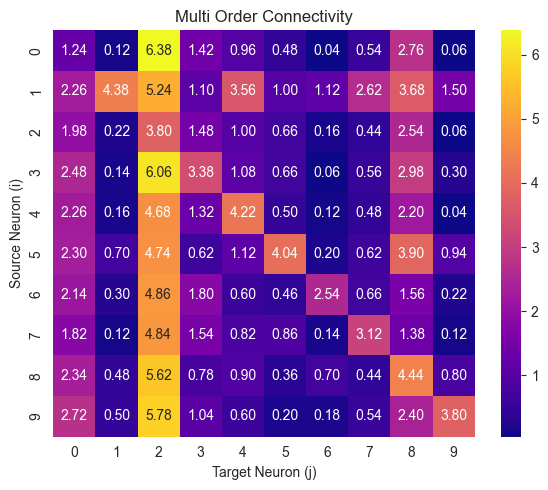

In [53]:
ole.show_connectivity_heatmaps()            # Heatmaps of connectivity matrices

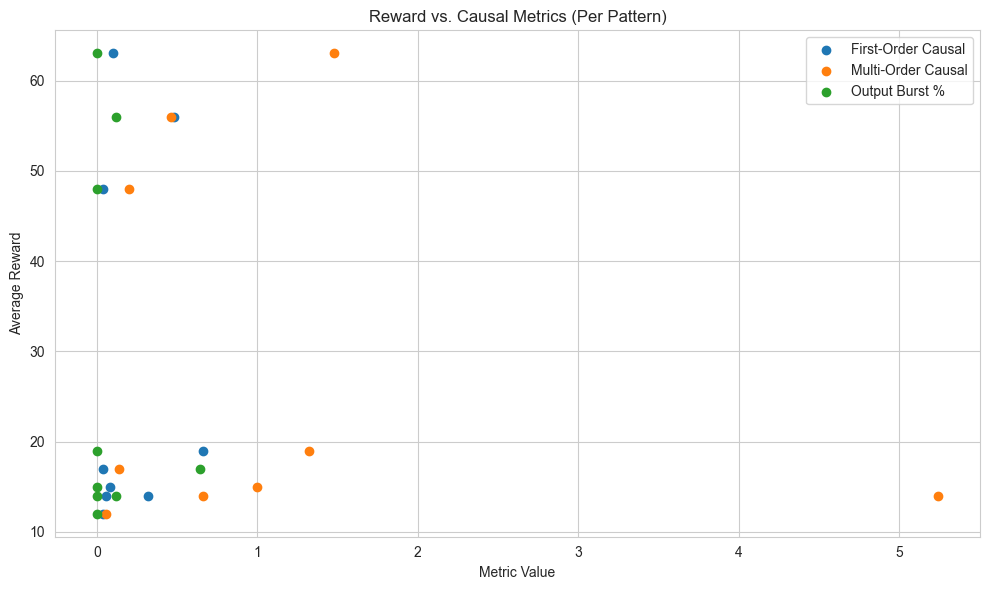

In [84]:
df = ole.show_reward_vs_causal_plot("Adaptive")

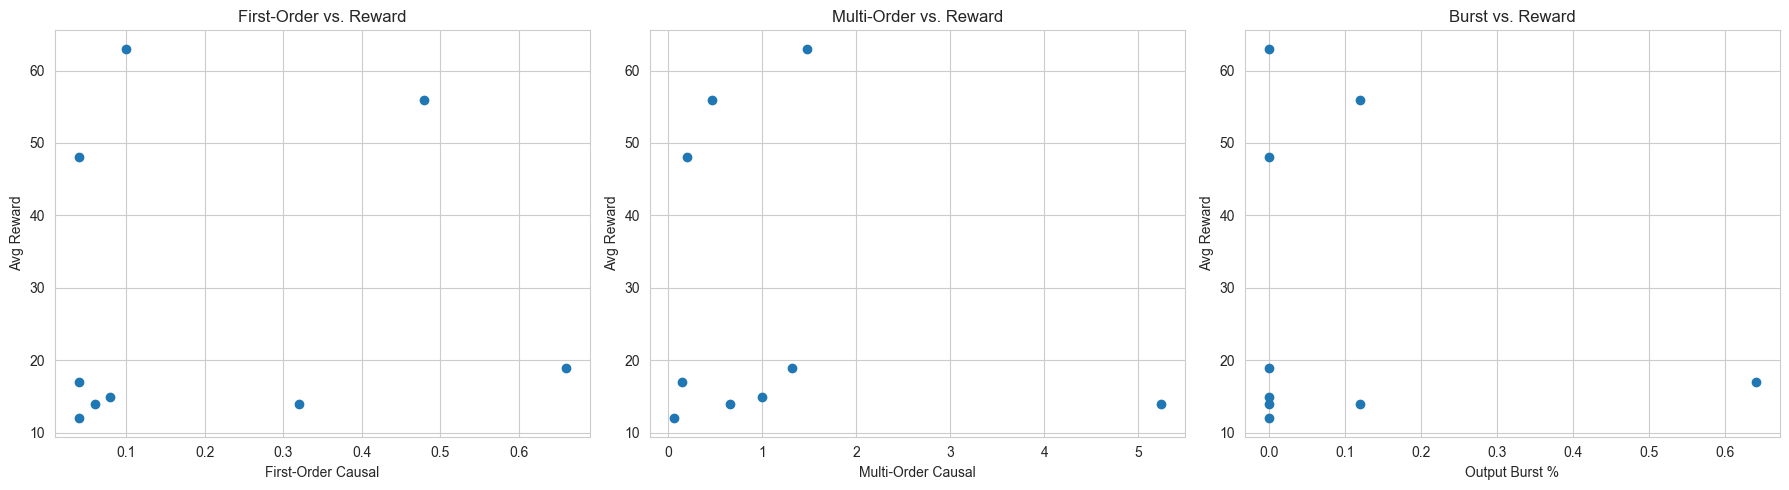

In [85]:
# Scatter plots of metrics vs reward
ole.show_metric_scatter_plots(df)

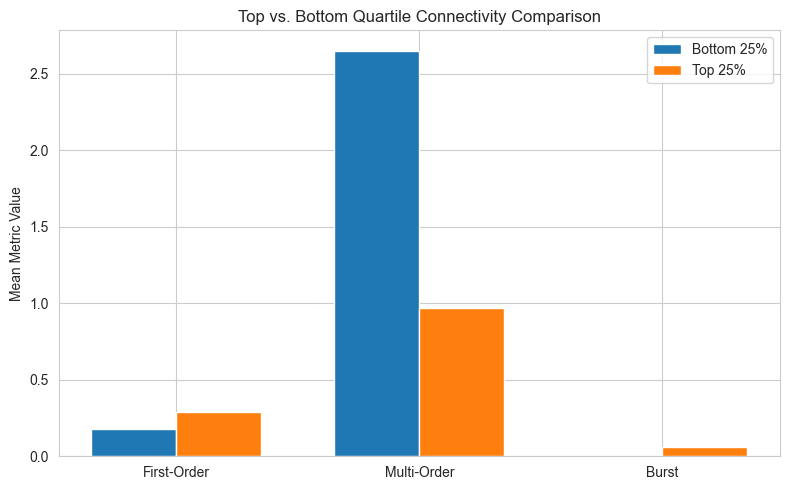

In [86]:
# Top vs bottom quartile metric comparison
ole.show_quartile_comparison_plot(df)

In [87]:
print(df.columns)
print(df.head())

Index(['Pattern', 'AvgReward', 'FirstOrder', 'MultiOrder', 'Burst'], dtype='object')
  Pattern  AvgReward  FirstOrder  MultiOrder  Burst
0     1-2       14.0        0.32        5.24   0.00
1     2-3       63.0        0.10        1.48   0.00
2     2-4       15.0        0.08        1.00   0.00
3     3-1       17.0        0.04        0.14   0.64
4     3-5       14.0        0.06        0.66   0.12


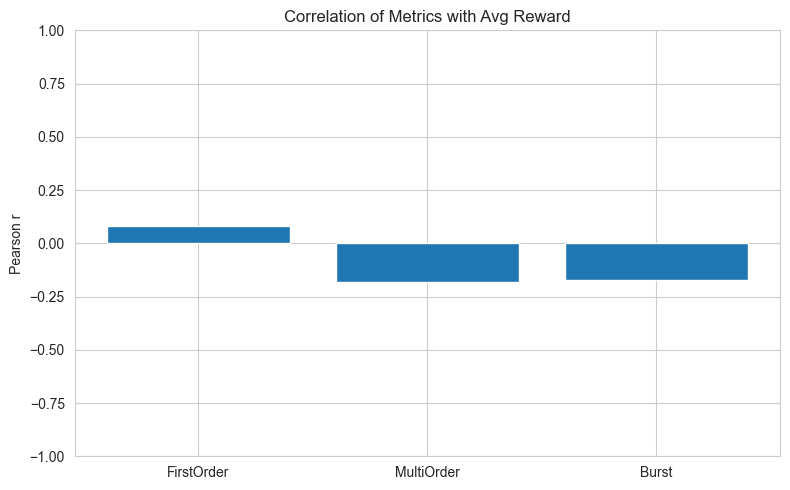

In [88]:
# Pearson correlation bar plot
ole.show_metric_correlation_plot(df)

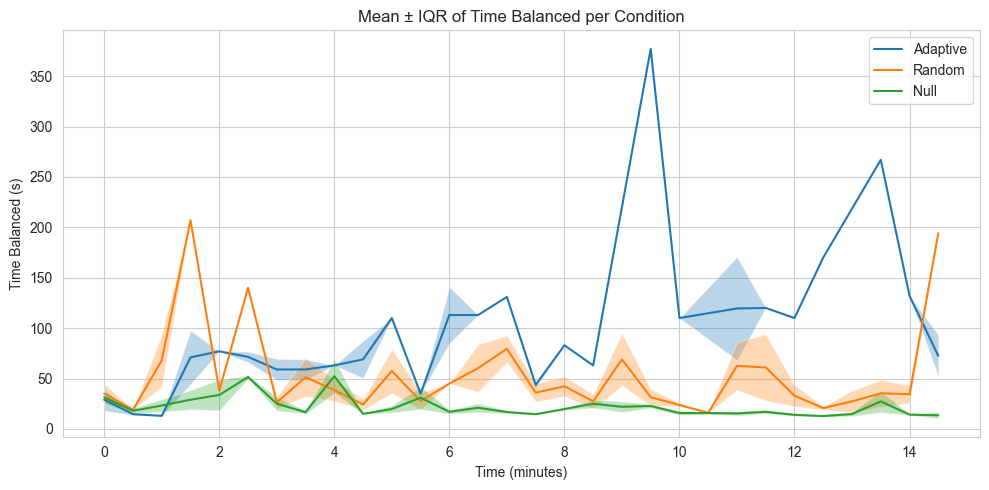

In [89]:
# Time balanced summary for all conditions
ole.show_performance_summary(bin_size=30, conditions=["Adaptive", "Random", "Null"])

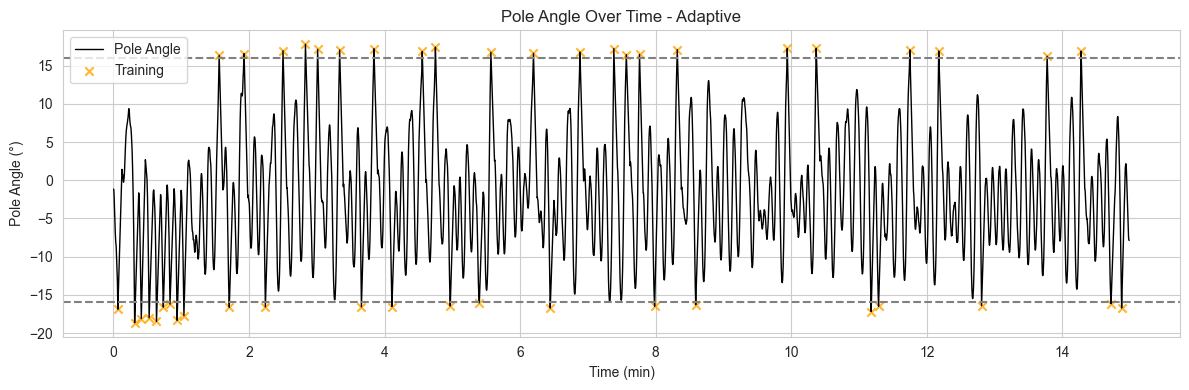

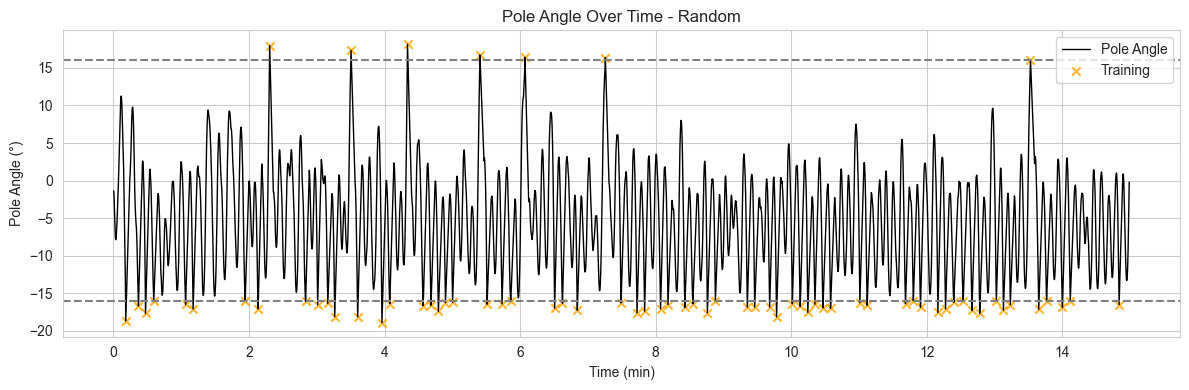

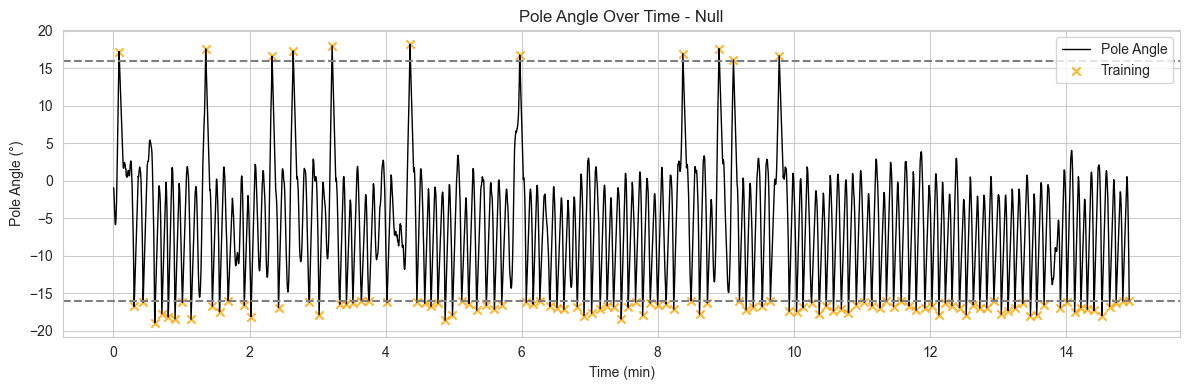

In [90]:
# Plot pole angle over time with shaded episodes and stim timings
ole.show_pole_angle_trajectories("Adaptive")
ole.show_pole_angle_trajectories("Random")
ole.show_pole_angle_trajectories("Null")

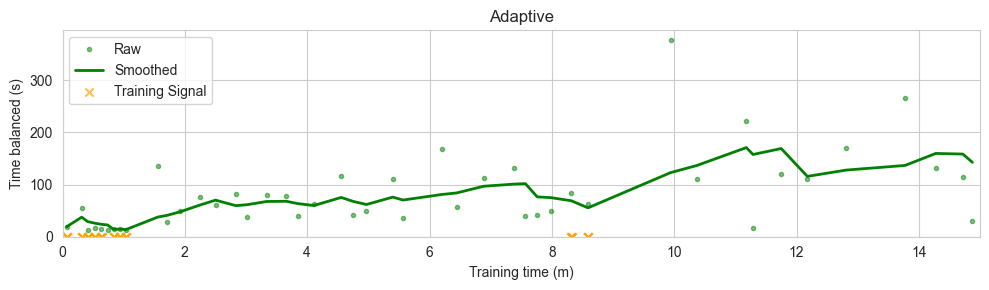

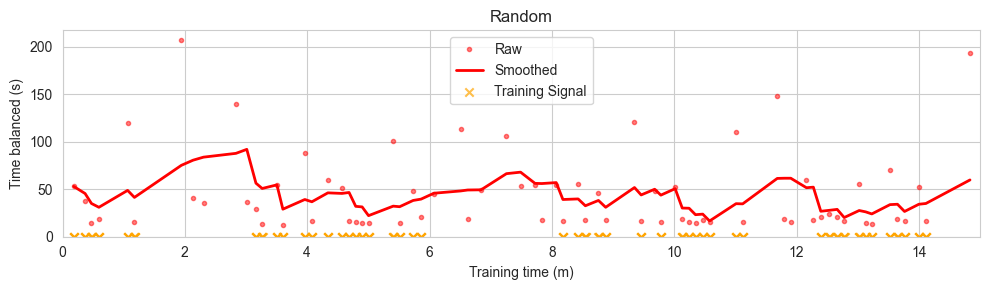

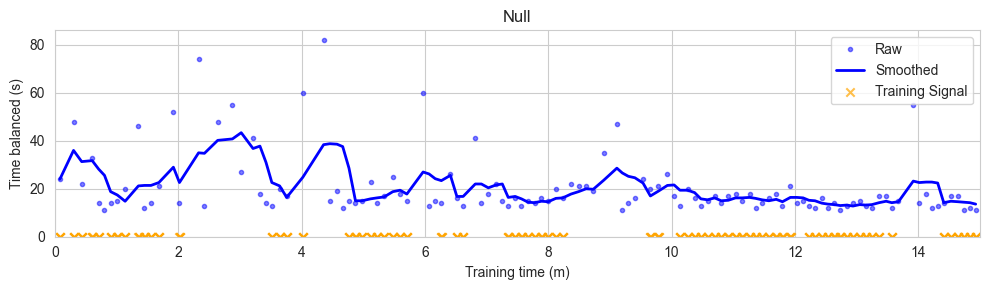

In [91]:
# Show episode vs training overlay for different conditions
ole.show_time_balanced_vs_training("Adaptive", color="green")
ole.show_time_balanced_vs_training("Random", color="red")
ole.show_time_balanced_vs_training("Null", color="blue")

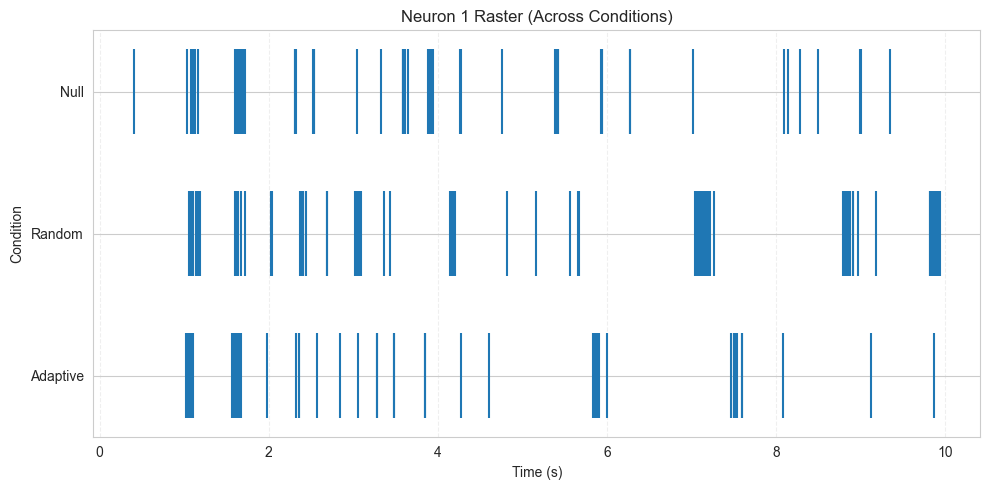

In [92]:
# shows comparative spiking activity of a specific neuron across all 3 conditions within the specified time range
ole.show_neuron_raster_comparison(neuron_id=1, start_s=0, end_s=10)

In [93]:
ole.log_data["Adaptive"]["log"].head()
ole.log_data["Adaptive"]["pattern"].head()

,time,reward,stim_indices
0,3.911506,19.0,"[4, 3]"
1,4.019525,19.0,"[4, 3]"
2,4.128859,19.0,"[4, 3]"
3,4.237211,19.0,"[4, 3]"
4,18.771035,56.0,"[6, 5]"


/Users/main_mac/data/org_eval/core/map_utils.py:200: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  ax.scatter(decode_pos[:, 0], decode_pos[:, 1], c='green', label='Decode', s=60,
/Users/main_mac/data/org_eval/core/map_utils.py:202: UserWarning: You passed both c and facecolor/facecolors for the markers. c has precedence over facecolor/facecolors. This behavior may change in the future.
  ax.scatter(train_pos[:, 0], train_pos[:, 1], c='purple', label='Training', s=60,


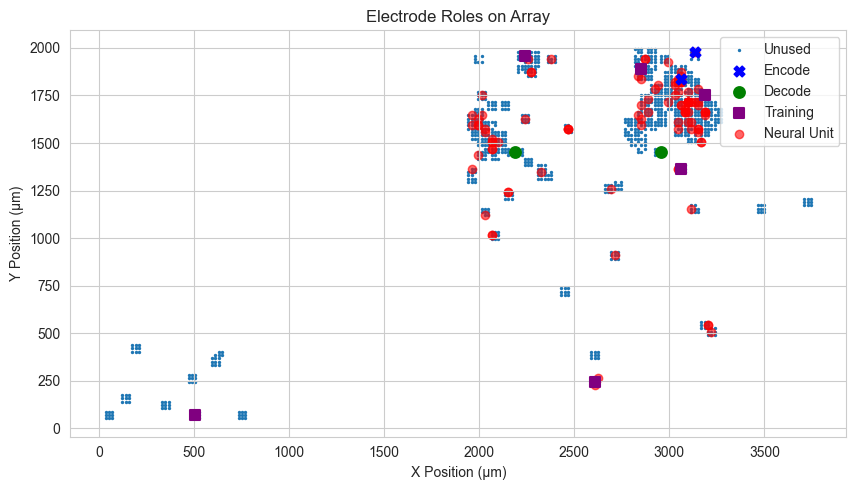

In [94]:
ole.show_combined_electrode_neuron_map()

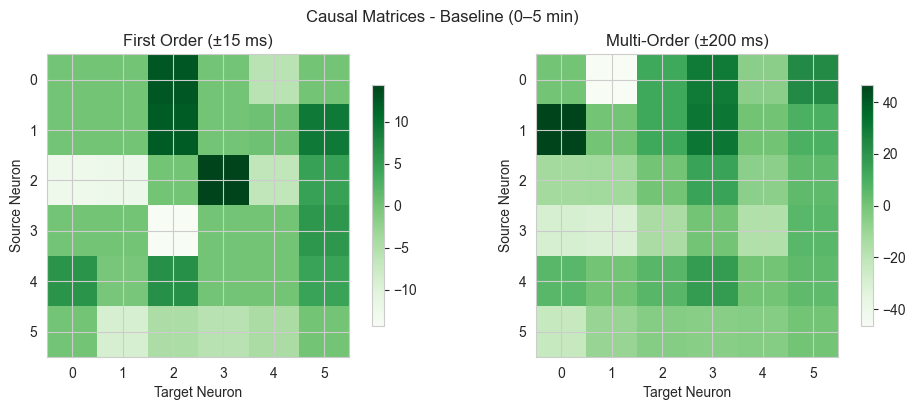

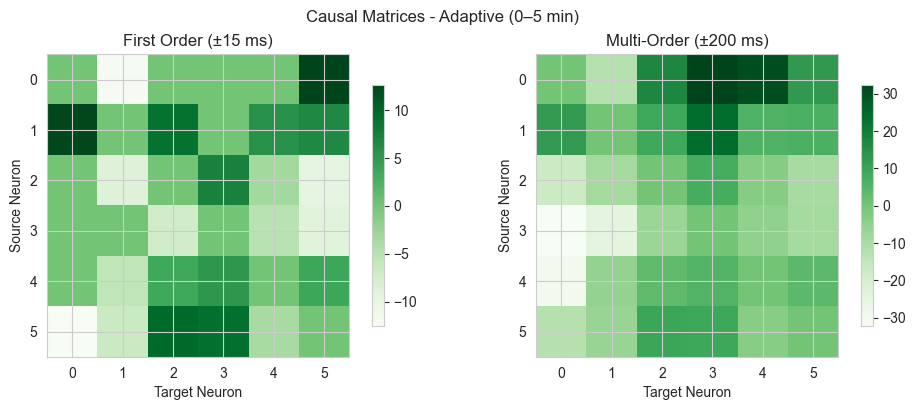

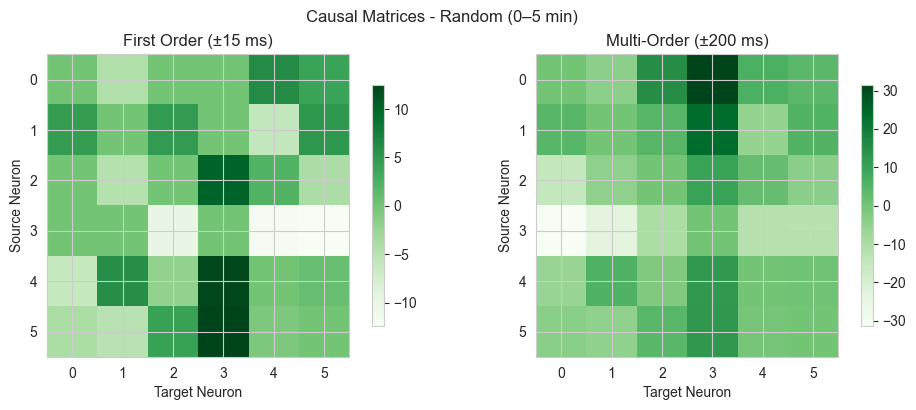

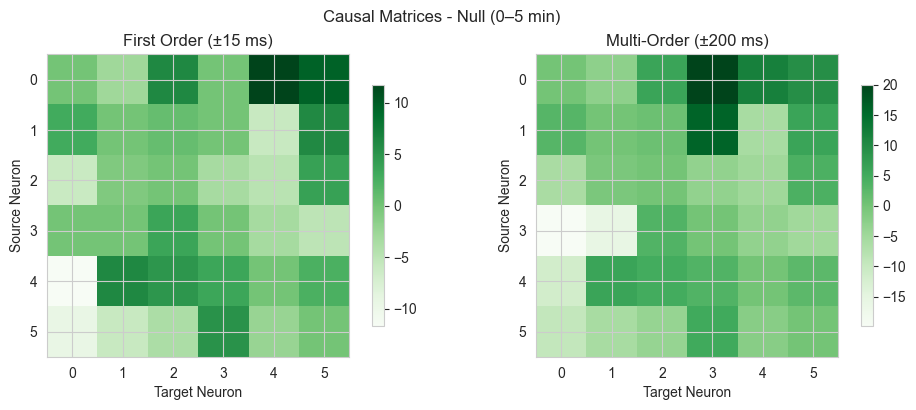

In [6]:
# Compute all causal matrices (first 5 min)
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.compute_causal_matrices(cond, start_ms=0, end_ms=300000)

# Show causal plots for each condition (restricted to training neurons)
training_inds = ole.metadata["training_inds"]
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    first = ole.causal_latency_matrices[(cond, 0, 300000)]
    multi = ole.multi_order_matrices[(cond, 0, 300000)]
    ole.show_causal_plot_from_matrices(first, multi,
                                       title=f"Causal Matrices - {cond} (0–5 min)",
                                       inds=training_inds)

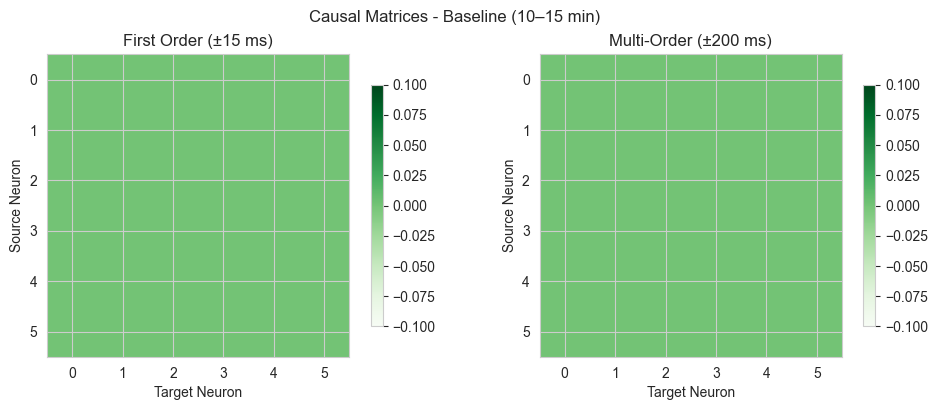

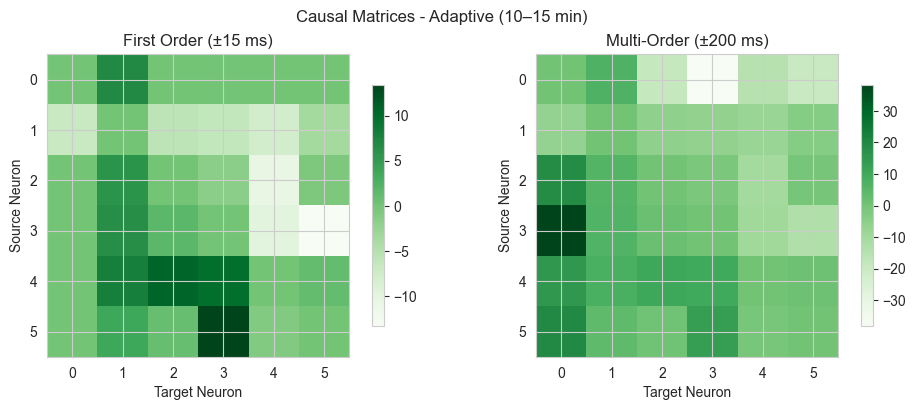

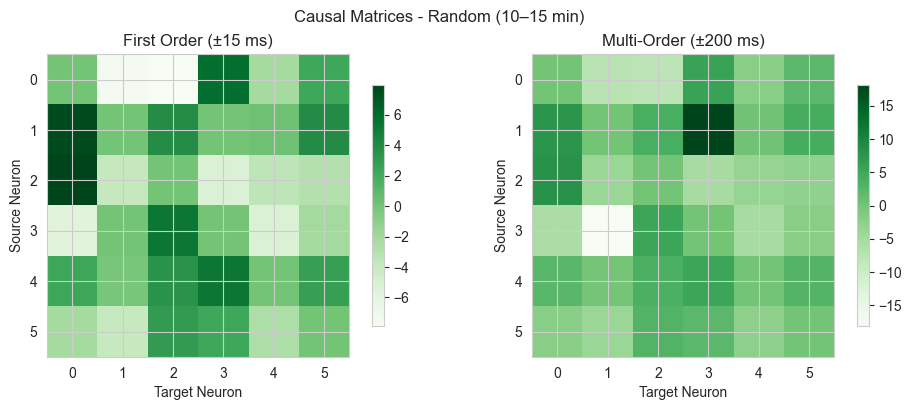

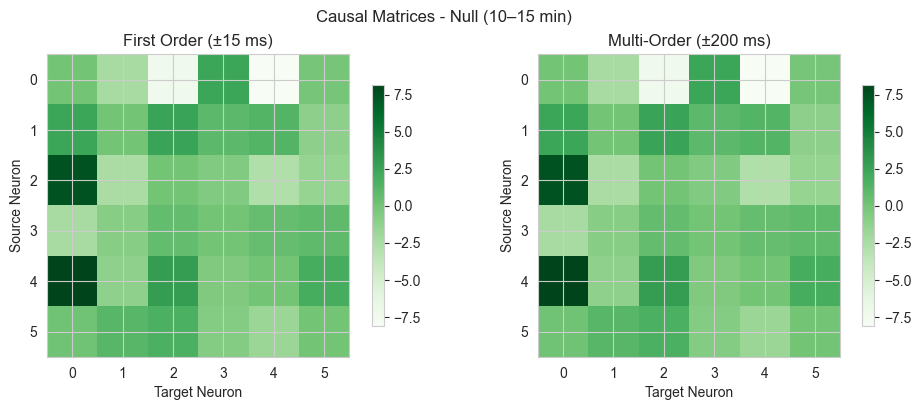

In [10]:
# Compute all causal matrices (final 5 min)
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.compute_causal_matrices(cond, start_ms=600000, end_ms=900000)

# Show causal plots for each condition (restricted to training neurons)
training_inds = ole.metadata["training_inds"]
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    first = ole.causal_latency_matrices[(cond, 600000, 900000)]
    multi = ole.multi_order_matrices[(cond, 600000, 900000)]
    ole.show_causal_plot_from_matrices(first, multi,
                                       title=f"Causal Matrices - {cond} (10–15 min)",
                                       inds=training_inds)

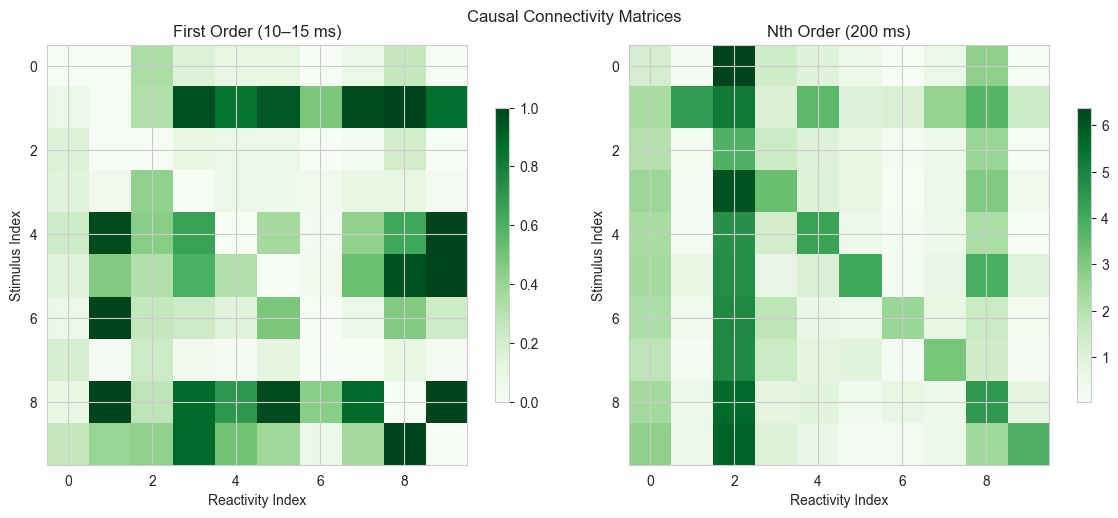

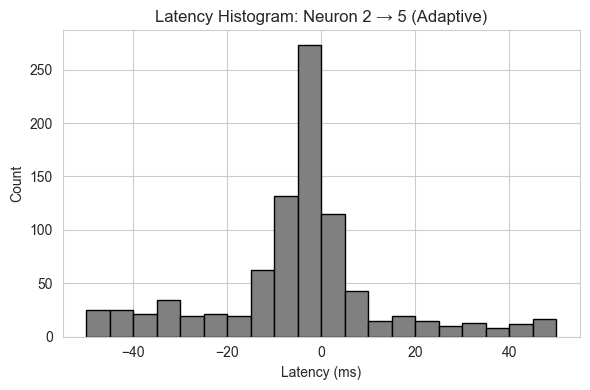

In [105]:
# Show ground truth causal matrix (baseline)
ole.show_causal_plot()

# Compute latency histograms
ole.compute_latency_histograms(window_ms=50, bin_size=5)

# View latency histogram for a specific pair
ole.show_latency_histogram_for_pair(condition="Adaptive", i=2, j=5)

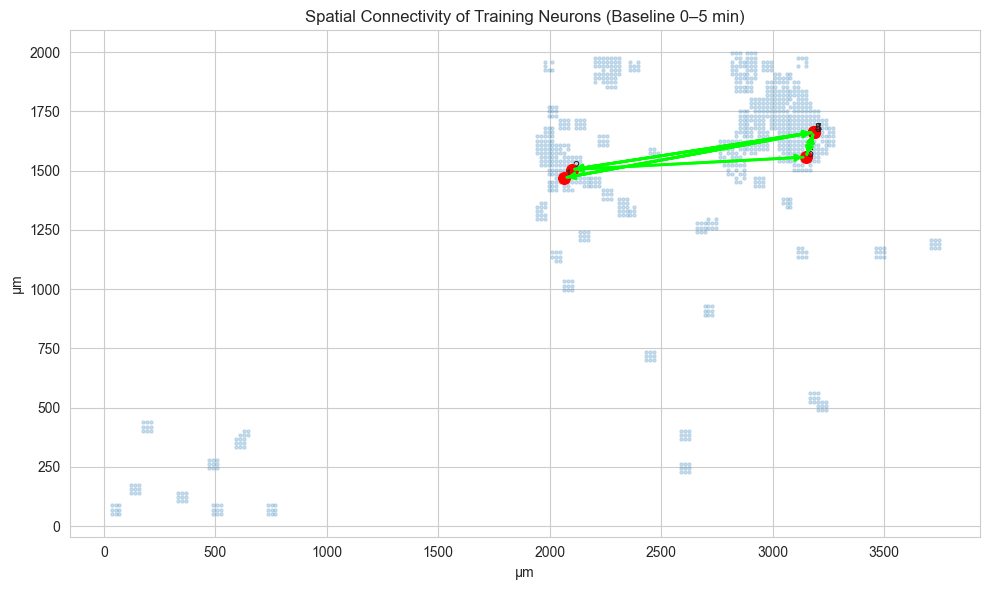

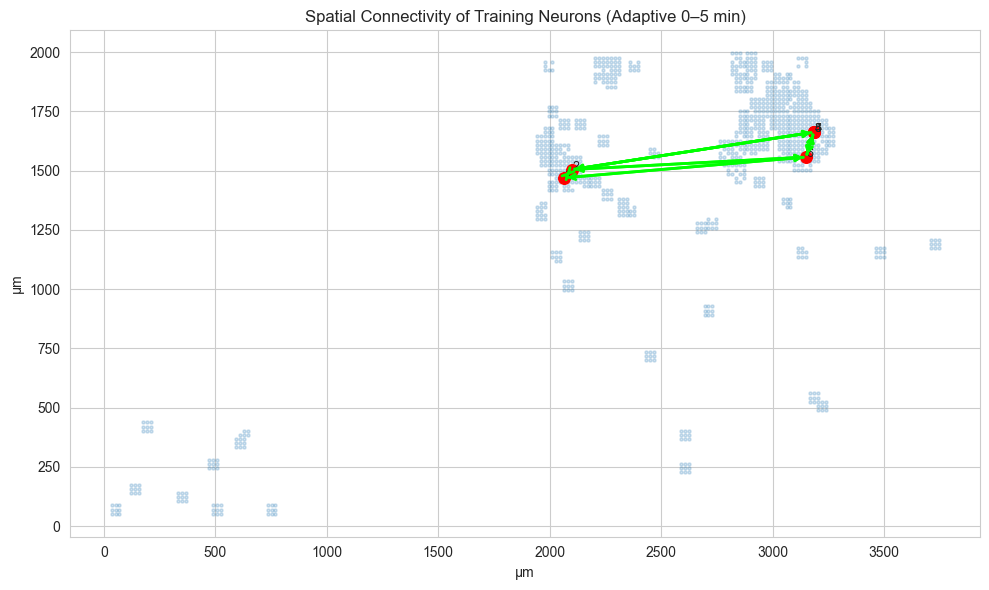

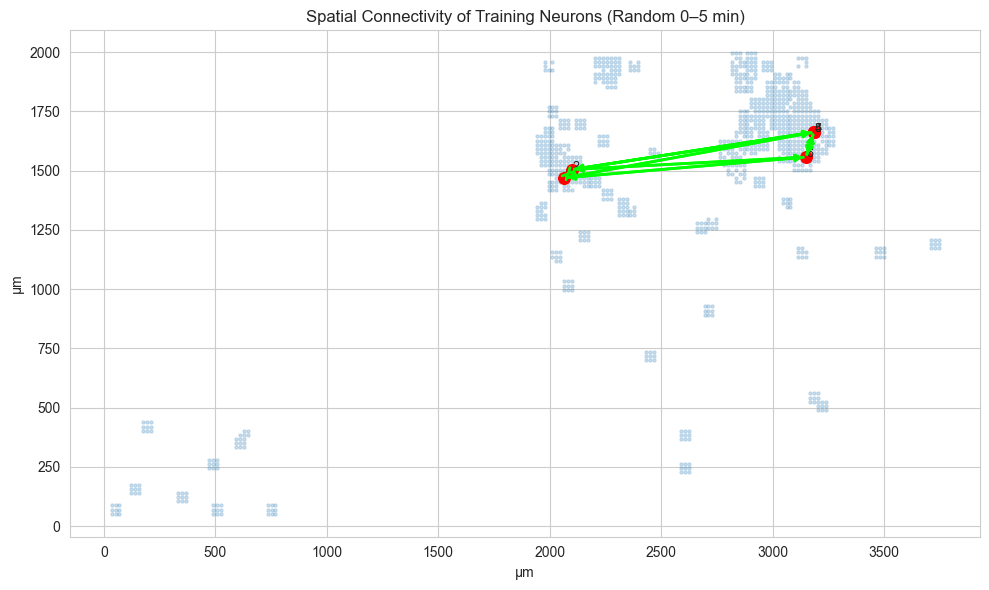

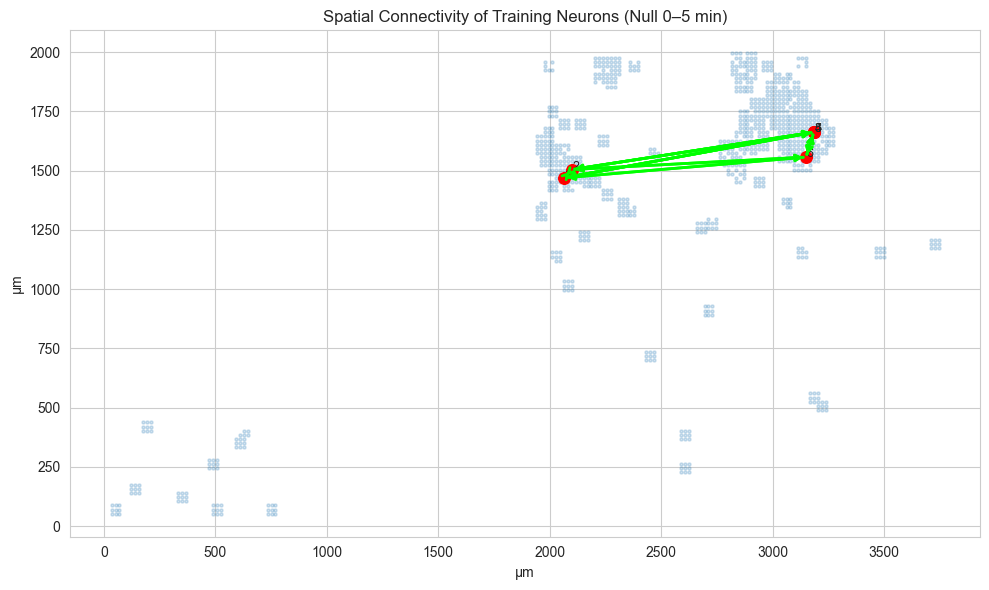

In [7]:
# Show spatial connectivity maps (first-order, training neurons only)
ole.show_training_spatial_connectivity_all_conditions()

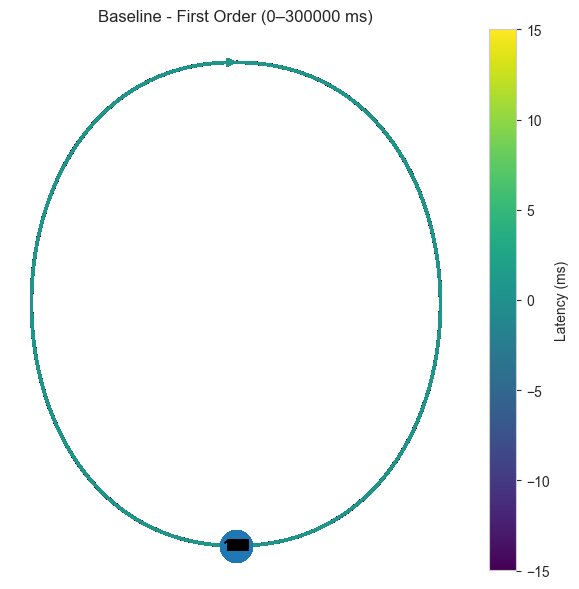

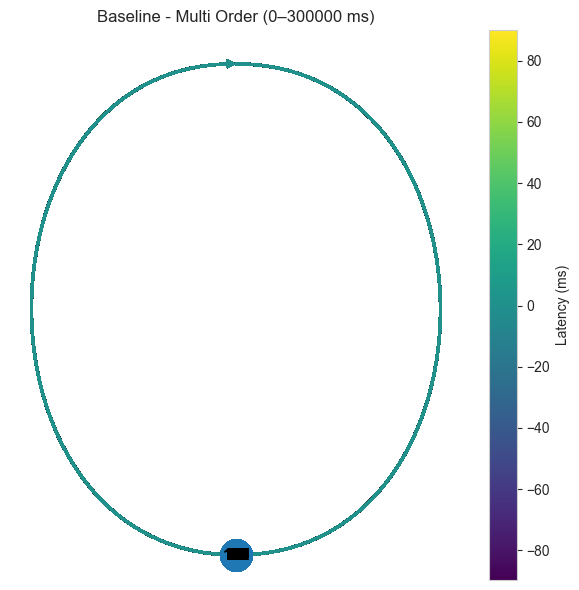

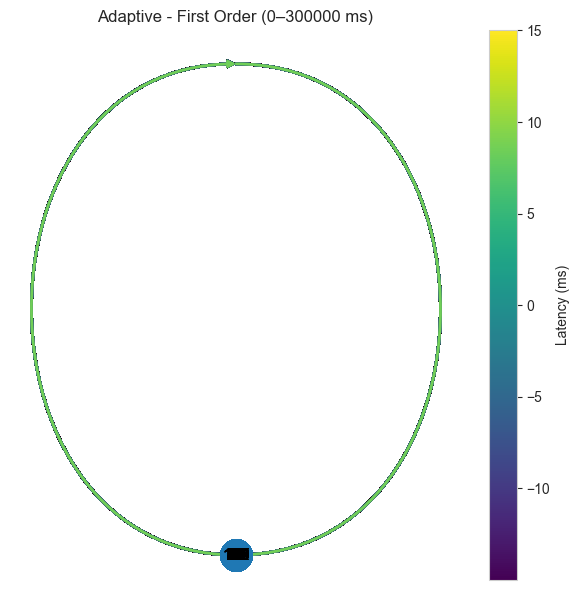

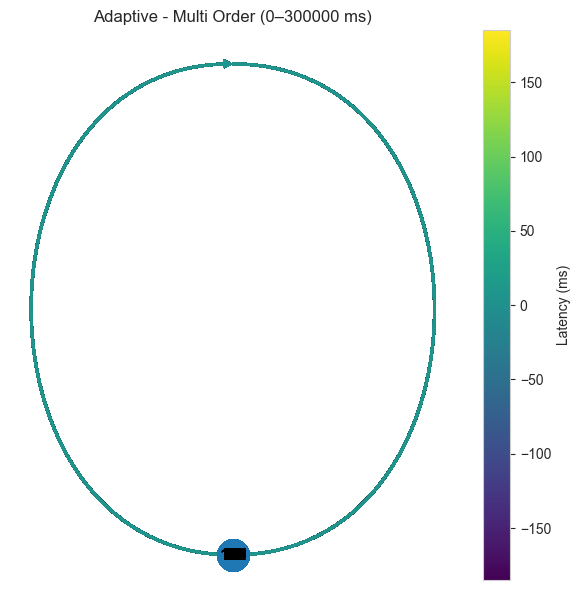

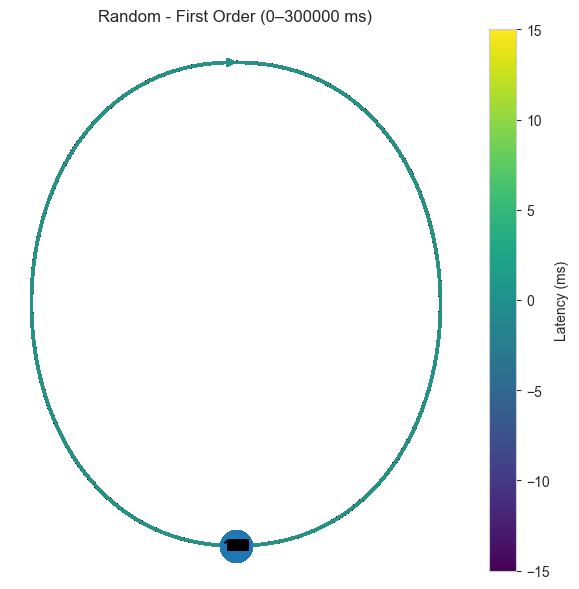

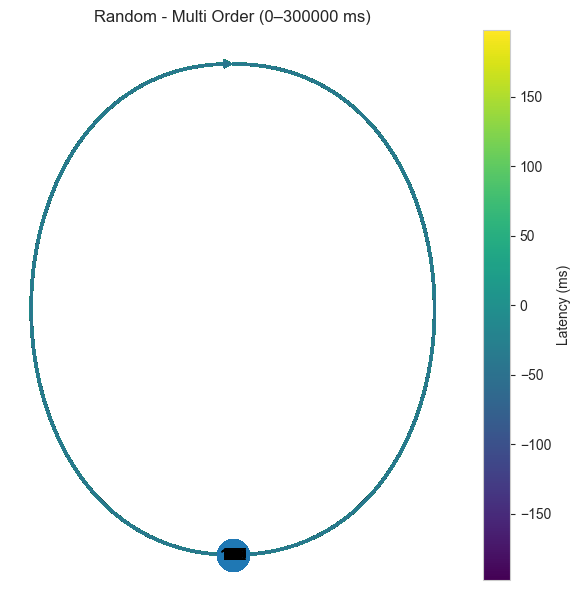

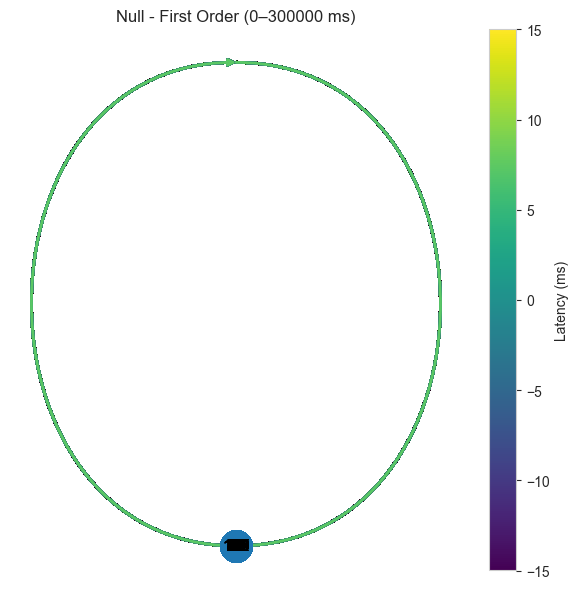

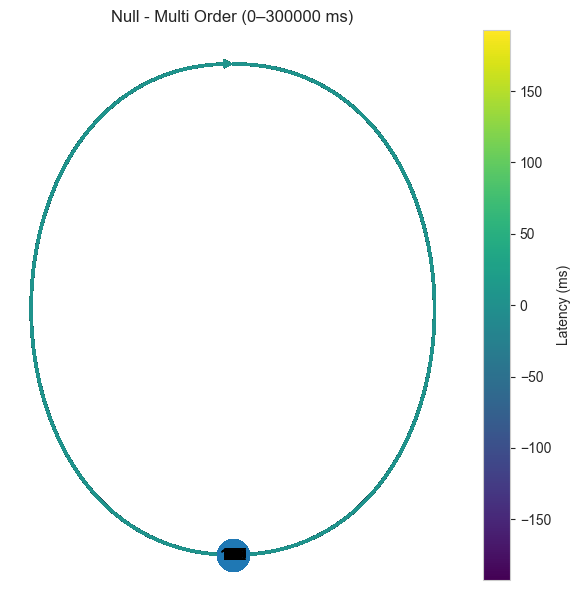

In [8]:
for cond in ["Baseline", "Adaptive", "Random", "Null"]:
    ole.show_spatial_connectivity_map(cond, order="first", start_ms=0, end_ms=300000)
    ole.show_spatial_connectivity_map(cond, order="multi", start_ms=0, end_ms=300000)

In [66]:
# Compute latency histograms and top firing sequences
ole.compute_latency_histograms(window_ms=50, bin_size=5)
ole.compute_firing_orders(window_ms=100, top_k=10)

# Show latency histogram for a specific neuron pair
ole.show_latency_histogram("Adaptive", i=3, j=7)

# Visualize top firing orders for each condition
ole.show_firing_order_summary("Adaptive")
ole.show_firing_order_summary("Random")
ole.show_firing_order_summary("Null")

KeyboardInterrupt: 

In [31]:
ole.compute_bursts()

In [32]:
ole.show_burst_stats("Adaptive")
ole.show_within_burst_dynamics("Adaptive")
ole.show_burst_latency_consistency("Adaptive")
ole.show_burst_propagation("Adaptive")

ValueError: too many values to unpack (expected 2)

In [33]:
ole.compare_burst_stats()
ole.compare_within_burst_dynamics()
ole.compare_burst_latency_consistency()
ole.compare_burst_propagation()

ValueError: too many values to unpack (expected 2)